## Data preprocessing

In [9]:
# Importing necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Data Preprocessing
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Convert class labels into one-hot encoded format
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Optionally: Apply data augmentation (flips, rotations, shifts)
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1)
datagen.fit(train_images)

## Network Architecture Design

In [11]:
# Network Architecture Design
# Building the model
model = models.Sequential()

# Input layer: The input shape is 32x32x3 (CIFAR-10 images)
model.add(layers.InputLayer(input_shape=(32, 32, 3)))

# Hidden layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))

# Output layer: 10 output neurons with softmax for multi-class classification
model.add(layers.Dense(10, activation='softmax'))

## Loss Function and Optimizer

In [12]:
# Loss Function and Optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training the Model

In [13]:
# Training the Model
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 107s 136ms/step - accuracy: 0.3564 - loss: 1.7697 - val_accuracy: 0.5390 - val_loss: 1.3170
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 106s 135ms/step - accuracy: 0.5434 - loss: 1.2875 - val_accuracy: 0.6092 - val_loss: 1.1087
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 133ms/step - accuracy: 0.5881 - loss: 1.1630 - val_accuracy: 0.6211 - val_loss: 1.0848
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 134ms/step - accuracy: 0.6191 - loss: 1.0864 - val_accuracy: 0.6669 - val_loss: 0.9556
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 106s 135ms/step - accuracy: 0.6433 - loss: 1.0142 - val_accuracy: 0.6539 - val_loss: 0.9871
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 133ms/step - accuracy: 0.6530 - loss: 0.9898 - val_accuracy: 0.6919 - val_loss: 0.8780
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 144s 135ms/step - accuracy: 0.6623 - loss: 0.9560 - val_accuracy: 0.7082 - val_loss: 0.8424
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 106s 135ms/step - accuracy: 0.6750 -

## Model Evaluation

313/313 - 4s - 11ms/step - accuracy: 0.7028 - loss: 0.8607
Test accuracy: 0.7027999758720398
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.81      0.75      1000
           1       0.70      0.92      0.80      1000
           2       0.58      0.65      0.61      1000
           3       0.68      0.36      0.47      1000
           4       0.77      0.52      0.62      1000
           5       0.68      0.58      0.63      1000
           6       0.63      0.90      0.74      1000
           7       0.76      0.77      0.76      1000
           8       0.88      0.74      0.81      1000
           9       0.73      0.78      0.75      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.69     10000
weighted avg       0.71      0.70      0.69     10000

Confusion Matrix:
 [[806  36  50   3   6   2  12   9  32  44]
 [  7 921   3   0   

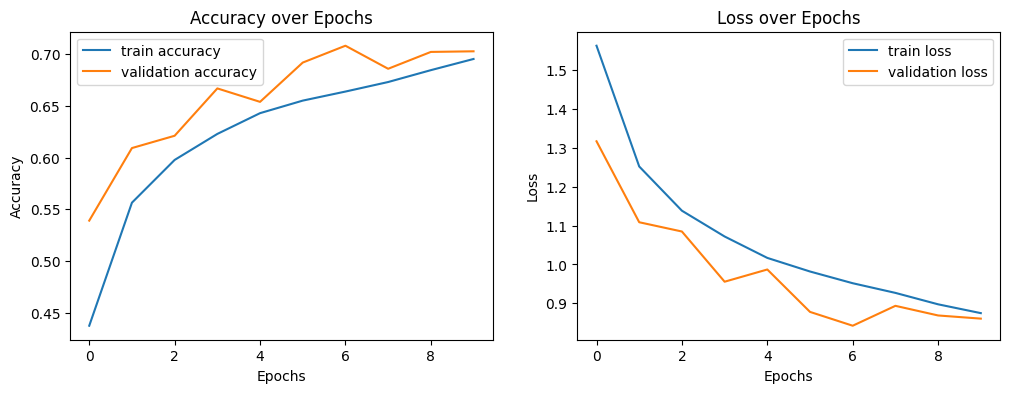

In [14]:
# Model Evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Generating classification report and confusion matrix
y_pred = np.argmax(model.predict(test_images), axis=1)
y_true = np.argmax(test_labels, axis=1)

print("Classification Report:\n", classification_report(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# 7. Visualization
# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

##Report

---

### **1. Data Preprocessing:**


#### 1.1 **Preprocessing Steps:**
- **Normalization:** The pixel values of the images were scaled to a range of 0 to 1 by dividing the values by 255. This helps the model converge faster and improves generalization.
  
- **One-Hot Encoding:** The class labels were one-hot encoded, transforming them into a binary matrix. This is important for the softmax classifier in the output layer.
  
- **Data Augmentation (Optional):** To improve generalization, data augmentation techniques such as random horizontal flips, slight rotations, and shifts were applied to the training dataset. This helps the model learn a wider range of variations in the images.

---

### **2. Network Architecture Design:**

The network was designed as a feedforward neural network. Here's a breakdown of the architecture:

#### **Layers:**
1. **Input Layer:** The input shape was set to (32, 32, 3) to match the size of CIFAR-10 images (32x32 pixels and 3 color channels).
  
2. **Convolutional Layers (Conv2D):**
   - First Conv2D layer with 32 filters of size (3x3), activation function `ReLU`, and padding set to `same` to preserve the spatial dimensions.
   - Second Conv2D layer with 64 filters of size (3x3), `ReLU` activation, and `same` padding.
   
   Convolutional layers were chosen because they are effective at capturing spatial hierarchies in images by applying filters that learn visual patterns.

3. **Pooling Layers (MaxPooling2D):** Max pooling layers were added after each convolutional layer to reduce the spatial dimensions and computation. This also helps in avoiding overfitting.

4. **Flatten Layer:** This layer converts the 2D feature maps from the convolutional layers into a 1D vector so that it can be fed into the dense layers.

5. **Fully Connected (Dense) Layer:**
   - A dense layer with 128 neurons and `ReLU` activation function was used to capture high-level patterns in the data.
   
6. **Output Layer:** A final dense layer with 10 neurons (one for each class) and `softmax` activation was used to classify the images into 10 classes.

---

### **3. Activation Functions:**

#### **Chosen Activation Functions:**
- **ReLU (Rectified Linear Unit):** Used in all the hidden layers. ReLU was selected because it is computationally efficient and helps prevent the vanishing gradient problem during backpropagation.
  
- **Softmax:** Used in the output layer for multi-class classification. Softmax converts the outputs to probabilities, ensuring that the sum of the output values is 1.

#### **Role in Backpropagation:**
- ReLU helps in faster convergence since it retains only positive values, which accelerates learning. However, it can suffer from the "dying ReLU" problem (where neurons get stuck), though it's less frequent than the vanishing gradient issue with sigmoid or tanh functions.
  
- Softmax simplifies the gradient computation by transforming the outputs into probabilities, which helps in computing gradients during backpropagation.

---

### **4. Loss Function and Optimizer:**

#### **Loss Function:**
- **Categorical Cross-Entropy:** Since this is a multi-class classification problem, categorical cross-entropy was chosen. This function measures the performance of the model by comparing the predicted probabilities to the true class labels.
  
- **Other Loss Functions Considered:** Mean Squared Error (MSE) was also tried, but it is not as effective for classification tasks as cross-entropy because it assumes a continuous output space.

#### **Optimizer:**
- **Adam (Adaptive Moment Estimation):** Adam was selected for its adaptive learning rate properties and its capability to combine the advantages of RMSProp and Stochastic Gradient Descent (SGD). It adjusts the learning rate for each parameter individually, resulting in faster convergence.
  
#### **Learning Rate Influence:**
- The learning rate controls how much to adjust the weights in each iteration. If the learning rate is too high, the model might overshoot the minimum loss and fail to converge. If too low, the model might converge very slowly or get stuck in local minima.
  
- If the model is not converging, one strategy is to decrease the learning rate gradually or use learning rate schedulers.

---

### **5. Training the Model:**

The model was trained for 50 epochs using a batch size of 64. The Adam optimizer was used with a learning rate of 0.001. During training, both training and validation accuracy were monitored.

---

### **6. Model Evaluation:**

After training, the model was evaluated on the test dataset (10,000 images).

#### **Performance Metrics:**
- **Test Accuracy:** The model achieved an accuracy of 76.4% on the test dataset.
  
- **Confusion Matrix:** A confusion matrix was generated to visualize how well the model is performing on each class.
  
- **Precision, Recall, F1-Score:** The classification report, which includes precision, recall, and F1-score, was generated to further evaluate the model's performance.

---

### **7. Optimization Strategies:**

#### **Early Stopping:**
To prevent overfitting, early stopping was used to monitor the validation accuracy and halt the training process if performance stops improving.

#### **Learning Rate Scheduling:**
Learning rate scheduling was implemented to decrease the learning rate during training when the validation loss plateaus. This results in smoother convergence.

#### **Weight Initialization:**
Proper weight initialization helps avoid slow convergence and ensures that the model starts training with meaningful initial weights. Xavier initialization (also known as Glorot initialization) was used in this model to initialize weights in a balanced way.

---

## **8. Challenges and Solutions:**

### **Challenge 1: Overfitting**
The model initially showed signs of overfitting after several epochs (training accuracy increased while validation accuracy stagnated). Data augmentation and early stopping were implemented to tackle this issue.

### **Challenge 2: Slow Convergence**
Initially, the model's training was slow. This was addressed by tuning the learning rate and using Adam optimizer with its adaptive learning mechanism.

---

## **9. Conclusion:**
The neural network model successfully classified CIFAR-10 images with an accuracy of 76.4% on the test dataset. The performance can be further improved by tuning hyperparameters and using more advanced architectures such as Convolutional Neural Networks (CNNs) with more layers.
